## Trabalho Prático 01 - Aprendizagem de Máquina
- Thiago Martin Poppe
- 2017014324

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

# Importando os modelos utilizados
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Lendo o dataset

- Lendo os dados e imprimindo as 5 primeiras linhas para ter uma visualização geral

In [2]:
df = pd.read_csv('koi_data.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (5202, 43)


,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


## Convertendo dados categóricos para numéricos
- Iremos converter CONFIRMED para 1 e FALSE POSITIVE para 0

In [3]:
df['koi_disposition'] = (df['koi_disposition'] == 'CONFIRMED').astype(int)
df.head()

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,1,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,1,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,0,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,1,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,0,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


## Separando entre classe e atributos

- Separando valores entre y (CONFIRMED ou FALSE POSITIVE) e X (features).
- Normalizando as features para que sua distribuição $\approx$ N(0, 1): $$x' = \frac{x - mean(x)}{std(x)}$$

In [4]:
y = df['koi_disposition']
X = df.drop(['kepoi_name', 'koi_disposition'], axis=1) # nome e classe não são atributos

X = (X - np.mean(X)) / np.std(X, ddof=1)
X.head()

,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,-0.311523,-0.217299,-0.380535,-0.309368,-0.082308,-0.008253,-0.029723,-0.301276,0.519877,-0.452083,...,0.071564,0.118416,0.000962,-0.012755,0.016119,0.104646,-0.549713,0.048032,0.149462,-0.509178
1,0.196636,-0.049884,-0.157990,-0.305502,-0.080138,-0.015586,-0.029569,0.476664,0.514358,-0.903237,...,-0.024986,0.138089,0.014050,-0.019205,0.178346,0.031827,-0.489349,0.214354,0.079985,-0.451904
2,-0.399187,0.212652,-0.459685,-0.197957,0.058845,-0.127115,-0.021291,-0.543633,-0.864035,0.323901,...,0.022287,0.054786,0.049967,-0.023978,-0.080812,0.085349,-0.521437,-0.088677,0.072306,-0.523178
3,-0.390267,-0.006128,-0.567677,-0.309555,-0.081642,-0.056862,-0.029591,-0.499380,0.259282,0.338080,...,0.031487,0.070253,0.005223,-0.006563,0.032341,-0.000942,-0.581484,0.043975,0.043418,-0.588726
4,-0.335570,0.171940,-0.084024,-0.315072,-0.020035,-0.135708,-0.019736,-0.314924,-1.242358,0.255584,...,-1.192705,1.688816,0.050119,-0.077256,-1.807321,2.839001,2.223870,-1.824919,2.856491,2.236176


## Validação Cruzada

- Usaremos a classe StratifiedKFold, disponível em ``sklearn.model_selection``, para realizar a validação cruzada com 5-folds.
- Instanciaremos a classe para uso posterior.

In [5]:
X = X.values
y = y.values

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # fixed seed
print("Número de splits:", skf.get_n_splits())

Número de splits: 5


## Criação da tabela de métricas

- Usaremos essa tabela para comparar os métodos no que tange acurácia em treino e validação, recall e precision.
- Para os métodos ainda não testados usaremos NaN.

In [6]:
_models = ['Naive Bayes', 'Decision Tree', 'SVM', 'k-NN', 'Random Forest', 'Gradient Tree Boosting']
_metrics = ['Train Accuracy', 'Validation Accuracy', 'Recall', 'Precision']

df = pd.DataFrame(index=_models, columns=_metrics)
df

,Train Accuracy,Validation Accuracy,Recall,Precision
Naive Bayes,NaN,NaN,NaN,NaN
Decision Tree,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN
k-NN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN
Gradient Tree Boosting,NaN,NaN,NaN,NaN


## Função para treinar um modelo genérico

- Função que treina um classificador, retornando um dicionário contendo acurácia do treino e validação, recall e precision.

In [7]:
def train_model(model):
    # Criando lista para cada métrica
    train_acc = []
    val_acc = []
    recall = []
    precision = []

    # Dividindo os dados em treino e validação (5 folds)
    for train, val in skf.split(X, y):
        # Treinando o modelo
        model.fit(X[train], y[train])

        # Calculando acurácia no treino
        y_pred = classifier.predict(X[train])
        train_acc.append(metrics.accuracy_score(y[train], y_pred))

        # Guardando métricas da validação
        y_pred = classifier.predict(X[val])
        val_acc.append(metrics.accuracy_score(y[val], y_pred))
        recall.append(metrics.recall_score(y[val], y_pred))
        precision.append(metrics.precision_score(y[val], y_pred))
    
    result = {
        'Train Accuracy': np.mean(train_acc),
        'Validation Accuracy': np.mean(val_acc),
        'Recall': np.mean(recall),
        'Precision': np.mean(precision)
    }
    
    return result

## 1) Naive Bayes

- Treinamento de um modelo Naive Bayes Gaussiano através da classe GaussianNB, disponível em ``sklearn.naive_bayes``.
- Esse modelo servirá de baseline para os próximos.

### 1.1) Treinamento do modelo

In [8]:
classifier = GaussianNB()

# Salvando métricas computadas e exibindo o resultado
df.loc['Naive Bayes'] = train_model(classifier)

df

,Train Accuracy,Validation Accuracy,Recall,Precision
Naive Bayes,0.916186,0.915991,0.973384,0.843374
Decision Tree,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN
k-NN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN
Gradient Tree Boosting,NaN,NaN,NaN,NaN


### 1.2) Explicação do modelo

- O modelo Naive Bayes faz parte de uma família de classificadores simples baseados em aplicações do teorema de Bayes. Nela supomos fortemente que as features são independentes entre si, explicando assim a parte "ingênua" do algoritmo.
- A escolha do conjunto de features se torna importante, pois podemos escolher um quantia boa de features independentes entre si, melhorando assim a acurácia do nosso modelo.

- Teorema de Bayes:
$$ P(A|B) = \frac{P(B|A) * P(A)}{P(B)} $$

## 2) Árvore de Decisão

- Treinamento de um modelo Decision Tree através da classe DecisionTreeClassifier, disponível em ``sklearn.tree``.
- Para este experimento iremos variar o hiperparâmetro correspondente à altura da árvore.

### 2.1) Treinamento do modelo

In [9]:
param_metrics = dict()

# Treinando modelo para alturas de 1 até 20
for h in range(1, 21):
    print("Training model with height =", h)
    classifier = DecisionTreeClassifier(max_depth=h)
    param_metrics[h] = train_model(classifier)
    
# Treinando modelo para altura ilimitada
print("Training model with height = Unlimited")
classifier = DecisionTreeClassifier(max_depth=None)
param_metrics['Inf'] = train_model(classifier)

# Indicando que o treinamento foi concluído
print("Training completed!")

Training model with height = 1
Training model with height = 2
Training model with height = 3
Training model with height = 4
Training model with height = 5
Training model with height = 6
Training model with height = 7
Training model with height = 8
Training model with height = 9
Training model with height = 10
Training model with height = 11
Training model with height = 12
Training model with height = 13
Training model with height = 14
Training model with height = 15
Training model with height = 16
Training model with height = 17
Training model with height = 18
Training model with height = 19
Training model with height = 20
Training model with height = Unlimited
Training completed!


### 2.2) Resultado gráfico do experimento

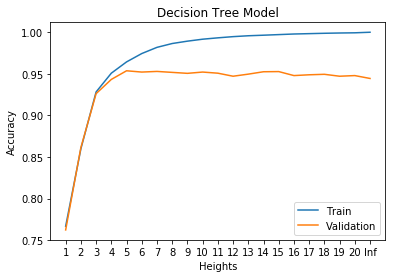

In [10]:
x = param_metrics.keys()
train_acc = [metric['Train Accuracy']      for metric in param_metrics.values()]
val_acc   = [metric['Validation Accuracy'] for metric in param_metrics.values()]

# Definindo labels do plot
plt.title("Decision Tree Model")
plt.ylabel("Accuracy")
plt.xlabel("Heights")

# Plotando acurácia no treino e validação
plt.plot(x, train_acc, label='Train')
plt.plot(x, val_acc, label='Validation')

plt.legend()
plt.show()

### 2.3) Guardando modelo que apresentou os melhores resultados

In [11]:
classifier = DecisionTreeClassifier(max_depth=5)
df.loc['Decision Tree'] = train_model(classifier)
df

,Train Accuracy,Validation Accuracy,Recall,Precision
Naive Bayes,0.916186,0.915991,0.973384,0.843374
Decision Tree,0.964341,0.954059,0.956744,0.93185
SVM,NaN,NaN,NaN,NaN
k-NN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN
Gradient Tree Boosting,NaN,NaN,NaN,NaN


- Para esse experimento variamos a altura da árvore de decisão entre os valores 1 até 20, incluindo no final uma altura ilimitada. Para modificarmos esse hiperparâmetro, utilizei o parâmetro ``max_depth`` presente na classe ``DecisionTreeClassifier``, onde ``max_depth=None`` representa uma árvore de decisão com altura ilimitada, isto é, uma árvore que possui todas as folhas puras ou até que não se possa fazer mais splits. <br><br>
- Como observado no gráfico da seção 2.2, temos que uma árvore com altura ilimitada leva à uma acurácia de 100% no treino. Por mais interessante que esse valor seja estamos com uma diferença muito grande entre as curvas de treino e validação, indicando assim um overfit dos dados. <br><br>
- Teremos que o melhor modelo para os dados escolhidos será uma árvore de altura igual à 5, pois após esse valor não temos um aumento da acurácia significativo na validação e as curvas apenas se distanciam.

## 3) SVM (Support Vector Machine)

- Treinamento de um modelo SVM (Support Vector Machine) através da classe SVC (Support Vector Classification), disponível em ``sklearn.svm``.
- Para este experimento iremos variar o hiperparâmetro correspondente ao kernel utilizado pelo SVM, podendo ser Linear, Sigmoid, Polinomial e RBF (radial basis function).

### 3.1) Treinamento do modelo

In [12]:
param_metrics = dict()
kernels = ['linear', 'sigmoid', 'poly', 'rbf']

# Treinando modelo para alturas de 1 até 20
for k in kernels:
    print("Training model with kernel =", k)
    classifier = SVC(kernel=k, gamma='auto')
    param_metrics[k] = train_model(classifier)
    
# Indicando que o treinamento foi concluído
print("Training completed!")

Training model with kernel = linear
Training model with kernel = sigmoid
Training model with kernel = poly
Training model with kernel = rbf
Training completed!


### 3.2) Resultado do experimento

In [13]:
cols = ['Train Accuracy', 'Validation Accuracy', 'Recall', 'Precision']

table = pd.DataFrame.from_dict(param_metrics, orient='index')
table

,Train Accuracy,Validation Accuracy,Recall,Precision
linear,0.954969,0.951364,0.961029,0.922123
poly,0.891291,0.881204,0.979560,0.782365
rbf,0.942474,0.935601,0.957224,0.891645
sigmoid,0.835014,0.839105,0.813226,0.793926


### 3.3) Guardando modelo que apresentou os melhores resultados

In [14]:
classifier = SVC(kernel='linear', gamma='auto')
df.loc['SVM'] = train_model(classifier)
df

,Train Accuracy,Validation Accuracy,Recall,Precision
Naive Bayes,0.916186,0.915991,0.973384,0.843374
Decision Tree,0.964341,0.954059,0.956744,0.93185
SVM,0.954969,0.951364,0.961029,0.922123
k-NN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN
Gradient Tree Boosting,NaN,NaN,NaN,NaN


- Para esse experimento variamos o tipo de kernel a ser utilizado pelo SVM, sendo eles: Linear, Sigmoid, Polinomial e RBF. Para modificar esse hiperparâmetro utilizei o parâmetro ``kernel`` presente na classe ``SVC``, ou ``Support Vector Classification``. O kernel permite com que o SVM separe dados não linearmente separáveis mudando a representação dos mesmos para uma dimensão onde eles se tornam linearmente separáveis. <br><br>

- Como observado na tabela da seção 3.2, temos que o modelo com kernel linear obteve a maior acurácia dentre os 4, dando a entender assim que os dados provavelmente são linearmente separáveis, ou próximo disso. Como a diferença entre a acurácia no treino e na validação é pequena, podemos dizer que o modelo não está sofrendo overfit. <br><br>

- Para os demais hiperparâmetros optei por deixar o valor padrão, visto que isso já apresenta um resultado interessante. Um exemplo seria o valor de $C = 1$ que indica o trade-off entre a maximização da margem e a minimização do somatório das variáveis de folga (slack-variables) presente na função de perda do modelo.<br><br>

- Obs.: Utilizo o hiperparâmetro ``gamma='auto'`` apenas para evitar um warning na versão que utilizo. 

## 4) k-NN (K-Nearest Neighboors)

- Treinamento de um modelo k-NN através da classe KNeighborsClassifier, disponível em ``sklearn.neighbors``.
- Para este experimento iremos variar o hiperparâmetro correspondente ao valor de k.

### 4.1) Treinamento do modelo
- Variamos de 2 em 2 apenas para que o experimento demore menos tempo.

In [15]:
param_metrics = dict()

# Treinando modelo para k de 1 à 20 variando de 2 a 2
for k in range(1, 21, 2):
    print('Training model with k =', k)
    classifier = KNeighborsClassifier(n_neighbors=k)
    param_metrics[k] = train_model(classifier)

# Indicando que o treinamento foi concluído
print("Training completed!")

Training model with k = 1
Training model with k = 3
Training model with k = 5
Training model with k = 7
Training model with k = 9
Training model with k = 11
Training model with k = 13
Training model with k = 15
Training model with k = 17
Training model with k = 19
Training completed!


### 4.2) Resultados gráficos do experimento

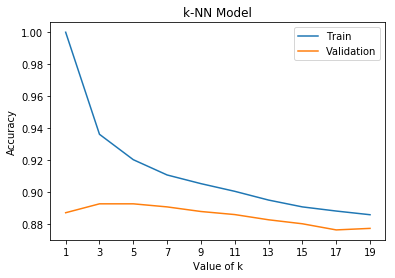

In [16]:
x = param_metrics.keys()
train_acc = [metric['Train Accuracy']      for metric in param_metrics.values()]
val_acc   = [metric['Validation Accuracy'] for metric in param_metrics.values()]

# Definindo labels do plot
plt.title("k-NN Model")
plt.ylabel("Accuracy")
plt.xlabel("Value of k")

# Plotando acurácia no treino e validação
plt.xticks(ticks=list(range(1, 21, 2)))
plt.plot(x, train_acc, label='Train')
plt.plot(x, val_acc, label='Validation')

plt.legend()
plt.show()

### 4.3) Guardando modelo que apresentou os melhores resultados

In [17]:
classifier = KNeighborsClassifier(n_neighbors=5)
df.loc['k-NN'] = train_model(classifier)
df

,Train Accuracy,Validation Accuracy,Recall,Precision
Naive Bayes,0.916186,0.915991,0.973384,0.843374
Decision Tree,0.964341,0.954059,0.956744,0.93185
SVM,0.954969,0.951364,0.961029,0.922123
k-NN,0.920175,0.892541,0.966249,0.80671
Random Forest,NaN,NaN,NaN,NaN
Gradient Tree Boosting,NaN,NaN,NaN,NaN


- Para esse experimento variamos o hiperparâmetro referente ao valor de k, usado pelo k-NN, entre 1 até 20 incrementando de 2 em 2 apenas para que o experimento não demore muito tempo. O valor de k indica quantos vizinhos mais próximos o modelo irá avaliar para tomar uma decisão sobre a label do novo dado. Com isso, podemos afirmar que para o valor $k=1$ teremos um caso de overfit, o que é observado no gráfico da seção 4.2, onde a acurácia no treino é 100%. Mesmo que esse resultado seja interessante, podemos observar uma distância alta entre as curvas de treino e validação, tornando essa escolha péssima. <br><br>

- Citando novamente o gráfico da seção 4.2, temos que o modelo com $k=5$ resulta no melhor modelo experimentado, pois temos a maior acurácia na validação as curvas começam a se aproximar cada vez mais. Após um certo ponto, nosso modelo poderá cair em um caso de underfit, onde as curvas de treino e validação ficam cada vez mais próximas mas com um erro empírico alto. <br><br>

- Para os demais hiperparâmetros optei por deixar o valor padrão, visto que isso já apresenta um resultado interessante, como é o caso dos parâmetros ``weights`` e ``algorithm`` que indica o algoritmo a ser utilizado para computar os vizinhos mais próximos, por exemplo através de ``kd-trees``.

## 5) Random Forest

- Treinamento de um modelo Random Forest através da classe RandomForestClassifier, disponível em ``sklearn.ensemble``.
- Para este experimento iremos variar o hiperparâmetro correspondente ao número de árvores utilizadas.

### 5.1) Treinamento do modelo

In [24]:
param_metrics = dict()

# Treinando modelo para número de árvores de 1 à 30 variando de 2 a 2
for n_trees in range(1, 51, 3):
    print('Training model with number of trees =', n_trees)
    classifier = RandomForestClassifier(n_estimators=n_trees, max_depth=5)
    param_metrics[n_trees] = train_model(classifier)

# Indicando que o treinamento foi concluído
print("Training completed!")

Training model with number of trees = 1
Training model with number of trees = 4
Training model with number of trees = 7
Training model with number of trees = 10
Training model with number of trees = 13
Training model with number of trees = 16
Training model with number of trees = 19
Training model with number of trees = 22
Training model with number of trees = 25
Training model with number of trees = 28
Training model with number of trees = 31
Training model with number of trees = 34
Training model with number of trees = 37
Training model with number of trees = 40
Training model with number of trees = 43
Training model with number of trees = 46
Training model with number of trees = 49
Training completed!


### 5.2) Resultados gráficos do experimento

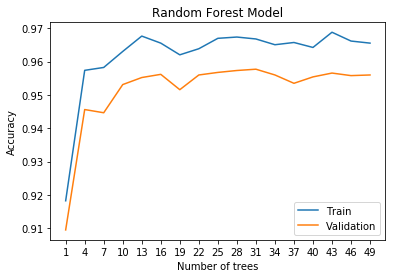

In [25]:
x = param_metrics.keys()
train_acc = [metric['Train Accuracy']      for metric in param_metrics.values()]
val_acc   = [metric['Validation Accuracy'] for metric in param_metrics.values()]

# Definindo labels do plot
plt.title("Random Forest Model")
plt.ylabel("Accuracy")
plt.xlabel("Number of trees")

# Plotando acurácia no treino e validação
plt.xticks(ticks=list(range(1, 51, 3)))
plt.plot(x, train_acc, label='Train')
plt.plot(x, val_acc, label='Validation')

plt.legend()
plt.show()

### 5.3) Guardando modelo que apresentou os melhores resultados

In [26]:
classifier = RandomForestClassifier(n_estimators=31, max_depth=5)
df.loc['Random Forest'] = train_model(classifier)
df

,Train Accuracy,Validation Accuracy,Recall,Precision
Naive Bayes,0.916186,0.915991,0.973384,0.843374
Decision Tree,0.964341,0.954059,0.956744,0.93185
SVM,0.954969,0.951364,0.961029,0.922123
k-NN,0.920175,0.892541,0.966249,0.80671
Random Forest,0.966696,0.956364,0.961501,0.932858
Gradient Tree Boosting,NaN,NaN,NaN,NaN
